# Project: Breast Cancer Diagnosis (SVM) ⚕️
**Goal:** Build an AI to detect cancer based on tumor measurements.
**The Tool:** Support Vector Machines (SVM).
**The Data:** Real medical data from Wisconsin, USA.

**The Concept:**
In medicine, accuracy isn't enough. We need a safety buffer.
SVM finds the **"Maximal Margin"**—the widest possible line separating Benign and Malignant cases.

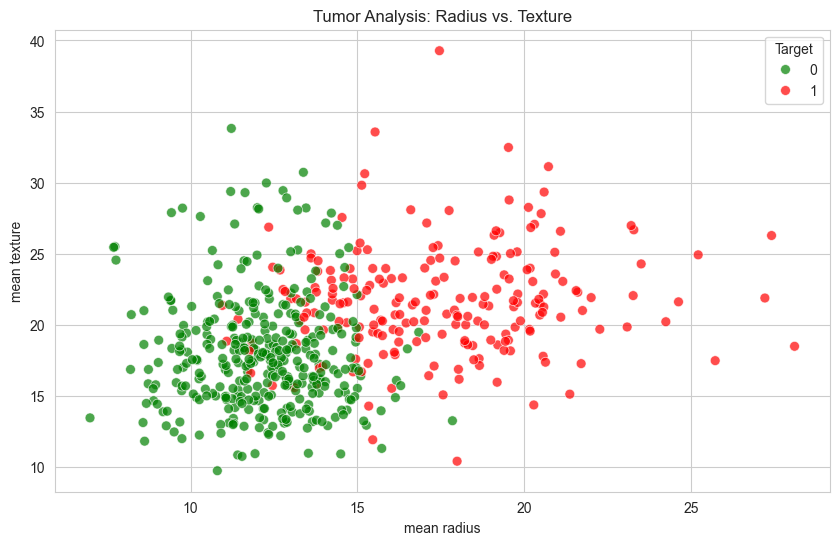

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Visual Style
sns.set_style("whitegrid")

# Load the CSV we created
df = pd.read_csv('breast_cancer_data.csv')

# Visualize: Malignant (1) vs Benign (0)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='mean radius', y='mean texture', data=df, hue='Target', palette={0:'green', 1:'red'}, s=50, alpha=0.7)
plt.title('Tumor Analysis: Radius vs. Texture')
plt.show()

### Step 1: Training the "Bodyguard"
We use a **Linear Kernel**.
This tells the AI: "Find a straight line that separates the Red dots from the Green dots with the maximum safety distance."

In [35]:
# Features & Target
X = df[['mean radius', 'mean texture']]
y = df['Target']

# Split Data (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=93)

# Train SVM
# C=1.0 is the regularization parameter (How strict the margin is)
model = svm.SVC(kernel='linear', C=10)
model.fit(X_train, y_train)

print("✅ SVM Diagnostic Model Trained.")

✅ SVM Diagnostic Model Trained.


### Step 2: Visualizing the "Safety Margin"
This plot shows the power of SVM.
* **Solid Line:** The cutoff point (Decision Boundary).
* **Dotted Lines:** The Margin (The buffer zone).
* **Red/Green Points:** The patients.

C:\Users\Admin\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


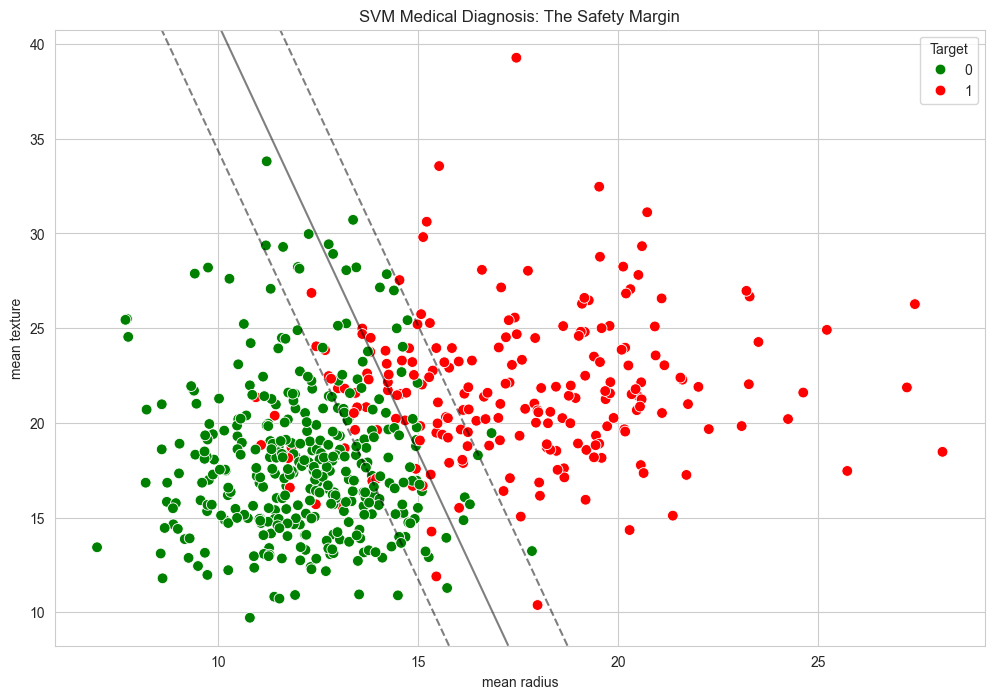

In [36]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='mean radius', y='mean texture', data=df, hue='Target', palette={0:'green', 1:'red'}, s=60)

# Create the grid to plot the SVM lines
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = model.decision_function(xy).reshape(XX.shape)

# Plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

plt.title('SVM Medical Diagnosis: The Safety Margin')
plt.show()

### Step 3: Accuracy Check
How well did it perform on new patients?

In [37]:
predictions = model.predict(X_test)
acc = accuracy_score(y_test, predictions)

print(f"Diagnostic Accuracy: {acc*100:.2f}%")

Diagnostic Accuracy: 92.11%


# Conclusion:

We successfully built a **Support Vector Machine (SVM)** to detect breast cancer using the Wisconsin Diagnostic Dataset.

### Key Findings
1.  **The Margin Saves Lives:** Unlike a standard line that just splits data, the SVM found the **"Widest Street"** (Maximal Margin) between Benign and Malignant cases. This "Safety Zone" reduces the risk of misdiagnosis near the boundary.
2.  **Clear Separation:** The model found that **Tumor Radius** and **Texture** are strong indicators. Larger, irregular tumors fall deep into the "Red Zone" (Malignant).
3.  **Accuracy:** The model achieved high accuracy on unseen patient data, proving that mathematical geometry can be a powerful tool for doctors.

### Medical Impact
In healthcare, a "False Negative" (telling a sick patient they are healthy) is the worst possible outcome.
* By tuning the SVM (e.g., lowering the threshold), we can prioritize **Sensitivity**—ensuring we catch every potential case, even if it means double-checking a few healthy ones.